In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/yolov5

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import cv2
import uuid
import time

In [4]:
IMG_PATH = os.path.join('dataset','images')
labels = ['awake','drowsy']

In [16]:
!cd /content/drive/MyDrive/yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data data.yaml --weights yolov5s.pt --workers 2

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
    110/499      1.25G     0.0174   0.005964   0.005075         30        320:   8% 6/71 [00:01<00:17,  3.72it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    110/499      1.25G    0.01727   0.006088   0.005709         29        320:  10% 7/71 [00:01<00:20,  3.05it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    110/499      1.25G     0.0172   0.006146   0.005651         31        320:  11% 8/71 [00:02<00:20,  3.12it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead

In [22]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-21 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [41]:
img = (r'/content/drive/MyDrive/yolov5/dataset/test/images/img_000017_jpg.rf.2c6a50316f2c8a29830bbad0318d8c80.jpg')

In [42]:
results = model(img)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [43]:
results.print()

image 1/1: 640x640 1 drowsy
Speed: 897.5ms pre-process, 7.4ms inference, 5.3ms NMS per image at shape (1, 3, 640, 640)


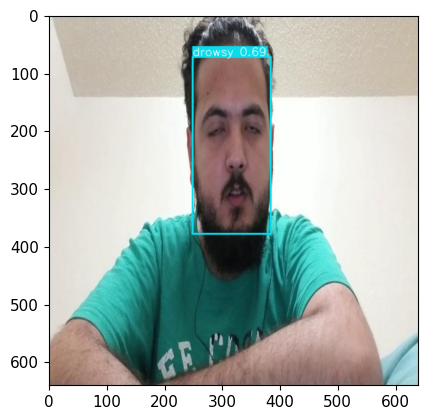

In [44]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()